In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

<font size="3">1300 UTC 30 March 2022-1300 UTC 31 March 2022</font>

In [2]:
#1 hr hrrr:
with open('hrrr_f01_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2124:2149]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[6.0000e-03 2.5600e+00 5.8310e+00 1.0444e+01 1.3194e+01 1.6102e+01
 2.0450e+01 2.2770e+01 2.4689e+01 2.7180e+01 2.7302e+01 2.8689e+01
 3.2825e+01 3.4150e+01 3.4446e+01 3.4514e+01 3.4530e+01 3.4531e+01
 3.4531e+01 3.4531e+01 3.4531e+01 3.4531e+01 3.4531e+01 3.4531e+01
 3.4531e+01]


In [3]:
#Air Temp CRN:
with open('CRNH0203-2022-MO_Salem_10_W.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2124:2149]
    temp_crn=np.cumsum(temp_crn)

    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.  12.7 20.2 26.1 30.4 32.8 35.  36.7 39.  40.8 43.1 45.1 47.3 48.1
 48.4 48.4 48.4 48.4 48.4 48.4 48.4 48.4 48.4 48.4 48.4]


In [4]:
# hour=[-12,-13,-14,-15,-16,-17,-18,-19,20,21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12]
# print(hour)

In [5]:
hour=[]
for i in range(-12,13,1):
    hour.append(i)
    i+=1
print(len(hour))

25


In [6]:
difference_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_sal.append(temp_i-temp_crn_i)

print(difference_sal)

[0.006, -10.14, -14.369, -15.656000000000002, -17.206000000000003, -16.698000000000004, -14.550000000000008, -13.93000000000001, -14.311000000000007, -13.620000000000005, -15.798000000000002, -16.411, -14.475000000000001, -13.949999999999996, -13.953999999999994, -13.885999999999996, -13.869999999999997, -13.869, -13.869, -13.869, -13.869, -13.869, -13.869, -13.869, -13.869]


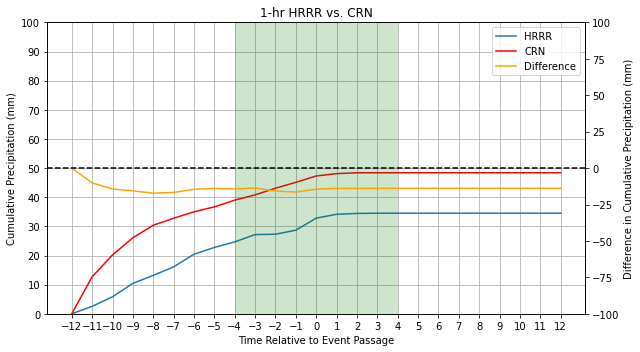

In [7]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_sal, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [8]:
# import matplotlib.pyplot as plt
# import numpy as np

# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True

# ax1 = plt.subplot()
# l1, = ax1.plot(hour,difference)
# l3, = ax1.plot(hour,temp_crn, color='red')
# ax2 = ax1.twinx()
# l2, = ax2.plot(hour,temp, color='orange')
# plt.title("1-hr HRRR vs. CRN")
# plt.ylabel("Air Temperature Difference (C)")
# ax1.set_ylabel("Air Temperature (C)")
# ax1.set_xlabel("UTC Hour")

# plt.legend([l1, l3,l2], ["HRRR", "Difference","CRN"])

# plt.show()

In [9]:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# ax1 = plt.subplot()
# l3, = ax1.plot(hour,difference)
# l1, = ax1.plot(hour,temp_crn,color='black')
# ax2 = ax1.twinx()
# l2, = ax2.plot(hour,temp,color="orange")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.yticks(np.arange(-3, 4, 1.0))
# ax1.set_yticks(np.arange(-5, 27, 3.0))
# plt.ylim(-5, 30)
# plt.title("1-hr HRRR vs. CRN")
# plt.ylabel("Air Temperature (C)")
# ax1.set_ylabel("Air Temperature (C)")
# ax1.set_xlabel("UTC Hour")
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)

# plt.legend([l2, l1,l3], ["HRRR", "CRN","Difference"])

# plt.show()

In [10]:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# ax1 = plt.subplot()
# l3, = ax1.plot(hour,temp)
# l1, = ax1.plot(hour,difference,color='black')
# ax2 = ax1.twinx()
# l2, = ax2.plot(hour,temp_crn,color="orange")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.yticks(np.arange(-3, 4, 1.0))
# ax1.set_yticks(np.arange(-5, 27, 3.0))
# plt.ylim(-5, 30)
# plt.title("1-hr HRRR vs. CRN")
# plt.ylabel("Air Temperature (C)")
# ax1.set_ylabel("Air Temperature (C)")
# ax1.set_xlabel("UTC Hour")
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)

# plt.legend([l3, l2,l1], ["HRRR", "CRN","Difference"])

# plt.show()

In [11]:
# #plot 1-hr:

# x= range(len(hour))
# fig,ax=plt.subplots(figsize = (9.00,4.50))
# ax.plot(hour,temp,linestyle="dashed",label="HRRR")
# ax.plot(hour,temp_crn,linestyle='dashdot',label="CRN")
# ax.plot(hour,difference,color="black",label="Difference")
# plt.title("1-hr HRRR vs. CRN")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temperature (C)")
# ax2=ax.twinx()
# ax.plot(x, y1, color = 'g')
# ax2.plot(x, y2, color = 'b')
# ax2.set_ylabel("Air Temperature (C)")
# #plt.xticks(default_x_ticks,hour)
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.legend()
# plt.show()

In [12]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# default_x_ticks= range(len(hour))
# plt.plot(hour,temp,linestyle="dashed",label="HRRR")
# plt.plot(hour,temp_crn,linestyle='dashdot',label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.legend()
# plt.show()

In [13]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem1 =math.sqrt(MSE)
# # salem1=math.ceil(salem1*100)/100
# # answer = str(round(answer, 2))
# print("RSME 1-hr 48-hr HRRR vs CRN :",salem1)

In [14]:
#3 hr hrrr:
with open('hrrr_f03_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2122:2147]
    temp=np.cumsum(temp)

    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[2.2000e-02 1.1760e+00 2.7260e+00 2.0671e+01 3.8749e+01 4.2979e+01
 4.6481e+01 4.7217e+01 4.7767e+01 5.1789e+01 5.4663e+01 5.4828e+01
 5.5629e+01 5.6928e+01 5.7008e+01 5.7010e+01 5.7029e+01 5.7033e+01
 5.7036e+01 5.7036e+01 5.7036e+01 5.7036e+01 5.7057e+01 5.7057e+01
 5.7057e+01]


In [15]:
diff3_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_sal.append(temp_i-temp_crn_i)

print(diff3_sal)

[0.022, -11.524, -17.474, -5.429000000000002, 8.348999999999993, 10.178999999999995, 11.480999999999995, 10.516999999999989, 8.766999999999989, 10.98899999999999, 11.562999999999995, 9.727999999999994, 8.328999999999994, 8.827999999999996, 8.607999999999997, 8.61, 8.628999999999998, 8.632999999999996, 8.635999999999996, 8.635999999999996, 8.635999999999996, 8.635999999999996, 8.656999999999996, 8.656999999999996, 8.656999999999996]


In [16]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='yellow', alpha=0.2, lw=0)
# plt.show()

In [17]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",salem3)

In [18]:
#6 hr hrrr:
with open('hrrr_f06_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2119:2144]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.893  2.453  9.393 13.846 32.719 36.041 38.866 42.249 49.754 53.539
 54.425 57.274 59.36  60.358 60.753 60.771 60.771 60.805 60.806 60.806
 60.808 60.81  60.901 60.932 60.932]


In [19]:
diff6_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_sal.append(temp_i-temp_crn_i)

print(diff6_sal)

[0.893, -10.247, -10.806999999999999, -12.254000000000001, 2.318999999999999, 3.2409999999999997, 3.8659999999999997, 5.5489999999999995, 10.754000000000005, 12.739000000000011, 11.325000000000017, 12.174000000000014, 12.06000000000001, 12.25800000000001, 12.353000000000016, 12.371000000000016, 12.371000000000016, 12.405000000000015, 12.406000000000013, 12.406000000000013, 12.408000000000015, 12.410000000000018, 12.501000000000019, 12.532000000000018, 12.532000000000018]


In [20]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [21]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",salem6)

In [22]:
#12 hr hrrr:
with open('hrrr_f12_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2113:2138]
    temp=np.cumsum(temp)
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[ 0.891  3.161 17.939 37.004 48.857 59.848 64.78  66.746 69.752 73.234
 73.281 73.364 73.54  73.711 73.724 73.869 73.91  73.931 73.939 73.939
 73.959 73.965 73.965 74.008 74.008]
25


In [23]:
diff12_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_sal.append(temp_i-temp_crn_i)

print(diff12_sal)

[0.891, -9.539, -2.2609999999999992, 10.904000000000003, 18.457000000000004, 27.048000000000002, 29.779999999999994, 30.045999999999985, 30.75199999999999, 32.43399999999999, 30.18099999999999, 28.26399999999999, 26.239999999999988, 25.610999999999997, 25.324000000000005, 25.469, 25.509999999999998, 25.531, 25.538999999999994, 25.538999999999994, 25.55899999999999, 25.56499999999999, 25.56499999999999, 25.607999999999997, 25.607999999999997]


In [24]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [25]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",salem12)

In [26]:
#18 hr hrrr:
with open('hrrr_f18_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2107:2132]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 2.643 19.514 48.41  54.883 66.517 72.373 74.29  75.713 76.342 76.749
 76.97  76.975 76.982 77.027 77.536 77.541 77.549 77.556 77.557 77.58
 77.596 77.601 77.608 77.608 77.608]


In [27]:
diff18_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_sal.append(temp_i-temp_crn_i)

print(diff18_sal)

[2.643, 6.814, 28.209999999999997, 28.782999999999994, 36.11699999999999, 39.572999999999986, 39.289999999999985, 39.012999999999984, 37.34199999999999, 35.94899999999999, 33.87, 31.874999999999993, 29.681999999999995, 28.927, 29.136000000000003, 29.141, 29.148999999999994, 29.156, 29.157000000000004, 29.18, 29.196000000000005, 29.201, 29.208000000000006, 29.208000000000006, 29.208000000000006]


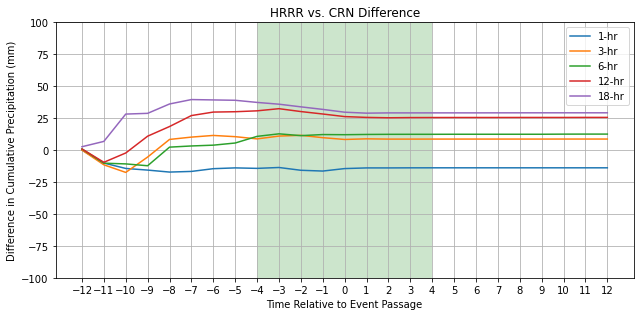

In [28]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_sal,label="1-hr")
plt.plot(hour,diff3_sal,label="3-hr")
plt.plot(hour,diff6_sal,label="6-hr")
plt.plot(hour,diff12_sal,label="12-hr")
plt.plot(hour,diff18_sal,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

In [29]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",salem18)

<font size="3">Batesville, AR: 1300 UTC 30 March 2022-1300 UTC 31 March 2022</font>

In [30]:
#1 hr hrrr:
with open('hrrr_f01_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2124:2149]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[1.0000e-02 1.1000e-02 1.8000e-02 1.8000e-02 1.0030e+00 6.0470e+00
 9.1280e+00 1.3258e+01 1.7878e+01 1.8962e+01 1.8962e+01 1.9845e+01
 2.0093e+01 2.0548e+01 2.0548e+01 2.0548e+01 2.0548e+01 2.0548e+01
 2.0548e+01 2.0548e+01 2.0548e+01 2.0548e+01 2.0548e+01 2.0548e+01
 2.0548e+01]


In [31]:
#Air Temp CRN:
with open('CRNH0203-2022-AR_Batesville_8_WNW.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2124:2149]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.   0.   0.   1.1  7.  12.4 16.3 21.9 24.3 24.3 24.3 25.  25.
 25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25. ]


In [32]:
difference_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_bat.append(temp_i-temp_crn_i)

print(difference_bat)

[0.01, 0.011, 0.018, 0.018, -0.0970000000000002, -0.9530000000000003, -3.2720000000000002, -3.0420000000000016, -4.0219999999999985, -5.337999999999997, -5.337999999999997, -4.454999999999998, -4.9069999999999965, -4.451999999999998, -4.451999999999998, -4.451999999999998, -4.451999999999998, -4.451999999999998, -4.451999999999998, -4.451999999999998, -4.451999999999998, -4.451999999999998, -4.451999999999998, -4.451999999999998, -4.451999999999998]


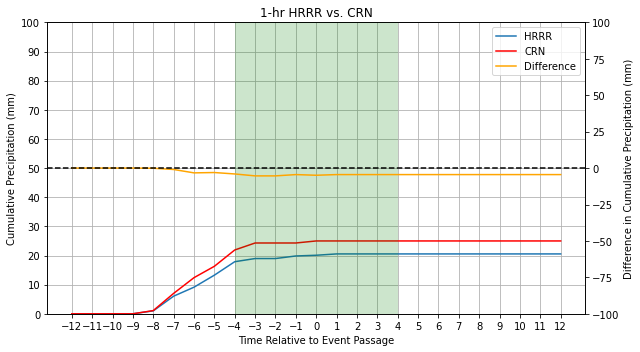

In [33]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_bat, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [34]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [35]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville1 = math.sqrt(MSE)
# print("RSME 1-hr 48-hr HRRR vs CRN :",batesville1)

In [36]:
#3 hr hrrr:
with open('hrrr_f03_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2122:2147]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[6.0000e-03 6.0000e-03 6.0000e-03 1.0000e-02 1.4000e-02 1.8980e+00
 2.1549e+01 2.8856e+01 3.3775e+01 3.4172e+01 3.4559e+01 3.4614e+01
 3.4833e+01 3.4888e+01 3.4888e+01 3.4888e+01 3.4888e+01 3.4888e+01
 3.4888e+01 3.4888e+01 3.4888e+01 3.4888e+01 3.4888e+01 3.4888e+01
 3.4888e+01]


In [37]:
diff3_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_bat.append(temp_i-temp_crn_i)

print(diff3_bat)

[0.006, 0.006, 0.006, 0.01, -1.086, -5.102, 9.149, 12.556000000000001, 11.875, 9.872, 10.259, 10.314, 9.833000000000002, 9.888000000000002, 9.888000000000002, 9.888000000000002, 9.888000000000002, 9.888000000000002, 9.888000000000002, 9.888000000000002, 9.888000000000002, 9.888000000000002, 9.888000000000002, 9.888000000000002, 9.888000000000002]


In [38]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [39]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",batesville3)

In [40]:
#6 hr hrrr:
with open('hrrr_f06_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2119:2144]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[6.0000e-03 1.3000e-02 1.3000e-02 4.5900e-01 5.2100e-01 1.1120e+00
 1.5926e+01 2.1411e+01 2.4816e+01 2.5350e+01 2.5350e+01 2.5683e+01
 2.5737e+01 2.5737e+01 2.5738e+01 2.5739e+01 2.5739e+01 2.5739e+01
 2.5741e+01 2.5741e+01 2.5741e+01 2.5741e+01 2.5741e+01 2.5741e+01
 2.5741e+01]


In [41]:
diff6_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_bat.append(temp_i-temp_crn_i)

print(diff6_bat)

[0.006, 0.013000000000000001, 0.013000000000000001, 0.459, -0.5790000000000001, -5.888, 3.526, 5.111000000000001, 2.916000000000004, 1.0500000000000043, 1.0500000000000043, 1.3830000000000027, 0.7370000000000019, 0.7370000000000019, 0.7380000000000031, 0.7390000000000043, 0.7390000000000043, 0.7390000000000043, 0.7410000000000032, 0.7410000000000032, 0.7410000000000032, 0.7410000000000032, 0.7410000000000032, 0.7410000000000032, 0.7410000000000032]


In [42]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [43]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",batesville6)

In [44]:
#12 hr hrrr:
with open('hrrr_f12_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2113:2138]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[2.3000e-02 4.2000e-02 3.8000e-01 8.3500e-01 2.0580e+00 3.8540e+00
 1.6922e+01 2.0045e+01 2.4687e+01 2.4744e+01 2.5073e+01 2.5139e+01
 2.5139e+01 2.5139e+01 2.5139e+01 2.5139e+01 2.5139e+01 2.5139e+01
 2.5139e+01 2.5139e+01 2.5139e+01 2.5139e+01 2.5139e+01 2.5139e+01
 2.5139e+01]
25


In [45]:
diff12_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_bat.append(temp_i-temp_crn_i)

print(diff12_bat)

[0.023, 0.041999999999999996, 0.38, 0.835, 0.9579999999999997, -3.146, 4.522, 3.745000000000001, 2.7870000000000026, 0.4440000000000026, 0.7730000000000032, 0.8390000000000022, 0.1390000000000029, 0.1390000000000029, 0.1390000000000029, 0.1390000000000029, 0.1390000000000029, 0.1390000000000029, 0.1390000000000029, 0.1390000000000029, 0.1390000000000029, 0.1390000000000029, 0.1390000000000029, 0.1390000000000029, 0.1390000000000029]


In [46]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [47]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",batesville12)

In [48]:
#18 hr hrrr:
with open('hrrr_f18_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2107:2132]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[9.0000e-03 9.0000e-03 2.6000e-02 1.1620e+00 8.1730e+00 2.3611e+01
 2.7195e+01 2.8103e+01 2.8400e+01 2.8677e+01 3.2003e+01 3.5079e+01
 3.5468e+01 3.5468e+01 3.5468e+01 3.5468e+01 3.5468e+01 3.5468e+01
 3.5468e+01 3.5468e+01 3.5468e+01 3.5468e+01 3.5468e+01 3.5468e+01
 3.5468e+01]


In [49]:
diff18_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_bat.append(temp_i-temp_crn_i)

print(diff18_bat)

[0.009, 0.009, 0.026000000000000002, 1.162, 7.073, 16.611, 14.795, 11.803, 6.5000000000000036, 4.377000000000006, 7.703000000000003, 10.779000000000003, 10.468000000000007, 10.468000000000007, 10.468000000000007, 10.468000000000007, 10.468000000000007, 10.468000000000007, 10.468000000000007, 10.468000000000007, 10.468000000000007, 10.468000000000007, 10.468000000000007, 10.468000000000007, 10.468000000000007]


In [50]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [51]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",batesville18)

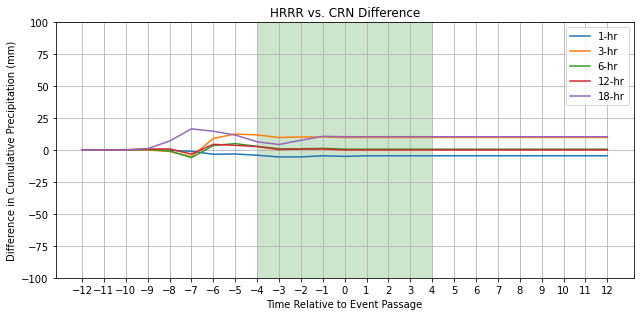

In [52]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_bat,label="1-hr")
plt.plot(hour,diff3_bat,label="3-hr")
plt.plot(hour,diff6_bat,label="6-hr")
plt.plot(hour,diff12_bat,label="12-hr")
plt.plot(hour,diff18_bat,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Lafayette, LA: 1700 UTC 30 March 2022-1700 UTC 31 March 2022</font>

In [53]:
#1 hr hrrr:
with open('hrrr_f01_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2128:2153]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[3.000e-03 3.000e-03 3.000e-03 1.000e-02 1.620e-01 7.850e-01 7.680e+00
 7.681e+00 7.681e+00 7.681e+00 7.681e+00 7.681e+00 7.681e+00 7.681e+00
 7.681e+00 7.681e+00 7.681e+00 7.681e+00 7.681e+00 7.681e+00 7.681e+00
 7.681e+00 7.681e+00 7.681e+00 7.681e+00]


In [54]:
#Air Temp CRN:
with open('CRNH0203-2022-LA_Lafayette_13_SE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2128:2153]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.   0.   0.   0.  23.5 24.  24.  24.  24.  24.  24.  24.  24.
 24.  24.  24.  24.  24.  24.  24.  24.  24.  24.  24. ]


In [55]:
difference_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_laf.append(temp_i-temp_crn_i)

print(difference_laf)

[0.003, 0.003, 0.003, 0.01, 0.162, -22.715, -16.32, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319, -16.319]


In [56]:
# hour=[]
# for i in range(-15,16,1):
#     hour.append(i)
#     i+=1
# print(len(hour))

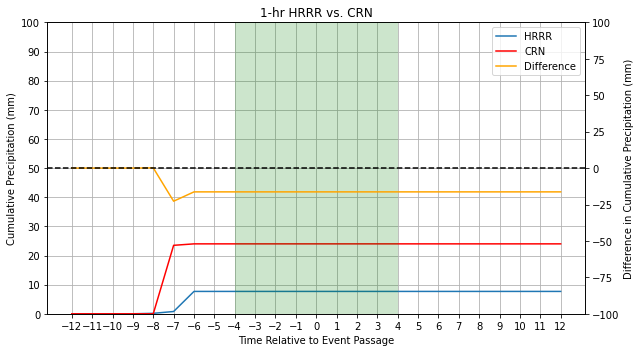

In [57]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_laf, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [58]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [59]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",lafayette1)

RSME 1-hr 48-hr HRRR vs CRN : 14.93441086082742


In [60]:
#3 hr hrrr:
with open('hrrr_f03_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2126:2151]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.00e+00 0.00e+00 1.00e-03 1.00e-03 3.60e-01 7.87e-01 8.30e+00 8.30e+00
 8.30e+00 8.30e+00 8.30e+00 8.30e+00 8.30e+00 8.30e+00 8.30e+00 8.30e+00
 8.30e+00 8.30e+00 8.30e+00 8.30e+00 8.30e+00 8.30e+00 8.30e+00 8.30e+00
 8.30e+00]


In [61]:
diff3_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_laf.append(temp_i-temp_crn_i)

print(diff3_laf)

[0.0, 0.0, 0.001, 0.001, 0.36, -22.713, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7, -15.7]


In [62]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [63]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",lafayette3)

RSME 3-hr 48-hr HRRR vs CRN : 14.421262040473435


In [64]:
#6 hr hrrr:
with open('hrrr_f06_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2123:2148]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.000e+00 0.000e+00 0.000e+00 8.000e-03 2.190e-01 7.295e+00 1.935e+01
 1.935e+01 1.935e+01 1.935e+01 1.935e+01 1.935e+01 1.935e+01 1.935e+01
 1.935e+01 1.935e+01 1.935e+01 1.935e+01 1.935e+01 1.935e+01 1.935e+01
 1.935e+01 1.935e+01 1.935e+01 1.935e+01]


In [65]:
diff6_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_laf.append(temp_i-temp_crn_i)

print(diff6_laf)

[0.0, 0.0, 0.0, 0.008, 0.219, -16.205, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999, -4.649999999999999]


In [66]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [67]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",lafayette6)

RSME 6-hr 48-hr HRRR vs CRN : 5.190289201961678


In [68]:
#12 hr hrrr:
with open('hrrr_f12_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2117:2142]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.    0.    0.007 0.077 3.923 4.407 4.411 4.412 4.412 4.412 4.412 4.412
 4.412 4.412 4.412 4.412 4.412 4.412 4.412 4.412 4.412 4.412 4.412 4.412
 4.412]
25


In [69]:
diff12_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_laf.append(temp_i-temp_crn_i)

print(diff12_laf)

[0.0, 0.0, 0.007, 0.07700000000000001, 3.923, -19.093, -19.589, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588, -19.588]


In [70]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [71]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",lafayette12)

RSME 12-hr 48-hr HRRR vs CRN : 17.515801858893017


In [72]:
#18 hr hrrr:
with open('hrrr_f18_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2111:2136]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.    0.    0.046 0.105 2.785 2.829 2.833 2.833 2.833 2.84  2.84  2.84
 2.84  2.84  2.84  2.84  2.84  2.84  2.84  2.84  2.84  2.84  2.84  2.84
 2.84 ]


In [73]:
diff18_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_laf.append(temp_i-temp_crn_i)

print(diff18_laf)

[0.0, 0.0, 0.046, 0.105, 2.785, -20.671, -21.167, -21.167, -21.167, -21.16, -21.16, -21.16, -21.16, -21.16, -21.16, -21.16, -21.16, -21.16, -21.16, -21.16, -21.16, -21.16, -21.16, -21.16, -21.16]


In [74]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [75]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",lafayette18)

RSME 18-hr 48-hr HRRR vs CRN : 18.913608723879218


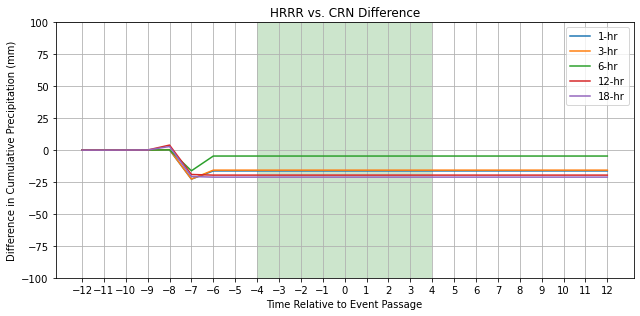

In [76]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_laf,label="1-hr")
plt.plot(hour,diff3_laf,label="3-hr")
plt.plot(hour,diff6_laf,label="6-hr")
plt.plot(hour,diff12_laf,label="12-hr")
plt.plot(hour,diff18_laf,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Monroe, LA: 1700 UTC 30 March 2022-1700 UTC 31 March 2022</font>

In [77]:
#1 hr hrrr:
with open('hrrr_f01_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2128:2153]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.156  0.99  35.406 37.24  41.582 41.584 41.584 41.584 41.584 41.584
 41.584 41.584 41.584 41.584 41.584 41.584 41.584 41.584 41.584 41.584
 41.584 41.584 41.584 41.584 41.584]


In [78]:
#Air Temp CRN:
with open('CRNH0203-2022-LA_Monroe_26_N.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2128:2153]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.3  0.3 27.2 32.7 33.3 33.3 33.3 33.3 33.3 33.3 33.3 33.3 33.3 33.3
 33.3 33.3 33.3 33.3 33.3 33.3 33.3 33.3 33.3 33.3 33.3]


In [79]:
difference_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_mon.append(temp_i-temp_crn_i)

print(difference_mon)

[-0.144, 0.69, 8.206, 4.539999999999999, 8.281999999999996, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999, 8.283999999999999]


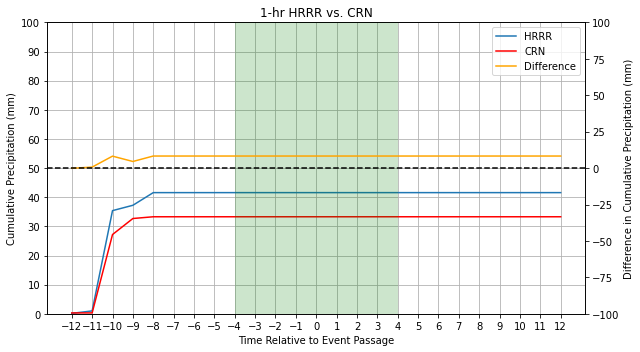

In [80]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_mon, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [81]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [82]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",monroe1)

RSME 1-hr 48-hr HRRR vs CRN : 7.8218450917926


In [83]:
#3 hr hrrr:
with open('hrrr_f03_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2126:2151]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.613  2.951 18.508 21.124 22.251 22.922 22.922 22.922 22.922 22.967
 22.967 22.967 22.967 22.967 22.967 22.967 22.967 22.967 22.967 22.967
 22.967 22.967 22.967 22.967 22.967]


In [84]:
diff3_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_mon.append(temp_i-temp_crn_i)

print(diff3_mon)

[0.313, 2.6510000000000002, -8.692, -11.576000000000004, -11.049000000000007, -10.378000000000007, -10.378000000000007, -10.378000000000007, -10.378000000000007, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006, -10.333000000000006]


In [85]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [86]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",monroe3)

RSME 3-hr 48-hr HRRR vs CRN : 9.95571508431213


In [87]:
#6 hr hrrr:
with open('hrrr_f06_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2123:2148]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[1.8000e-02 1.2800e-01 8.3520e+00 2.0323e+01 2.1140e+01 2.1512e+01
 2.1512e+01 2.1512e+01 2.1512e+01 2.1524e+01 2.1524e+01 2.1524e+01
 2.1524e+01 2.1524e+01 2.1524e+01 2.1524e+01 2.1524e+01 2.1524e+01
 2.1524e+01 2.1524e+01 2.1524e+01 2.1524e+01 2.1524e+01 2.1524e+01
 2.1524e+01]


In [88]:
diff6_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_mon.append(temp_i-temp_crn_i)

print(diff6_mon)

[-0.282, -0.172, -18.848, -12.377000000000002, -12.160000000000004, -11.788000000000004, -11.788000000000004, -11.788000000000004, -11.788000000000004, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003, -11.776000000000003]


In [89]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [90]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",monroe6)

RSME 6-hr 48-hr HRRR vs CRN : 11.714993014082426


In [91]:
#12 hr hrrr:
with open('hrrr_f12_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2117:2142]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[2.7000e-02 3.2900e+00 2.0035e+01 2.3491e+01 2.4016e+01 2.4016e+01
 2.4016e+01 2.4016e+01 2.4016e+01 2.7358e+01 2.7358e+01 2.7358e+01
 2.7358e+01 2.7358e+01 2.7358e+01 2.7358e+01 2.7358e+01 2.7358e+01
 2.7358e+01 2.7358e+01 2.7358e+01 2.7358e+01 2.7358e+01 2.7358e+01
 2.7358e+01]
25


In [92]:
diff12_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_mon.append(temp_i-temp_crn_i)

print(diff12_mon)

[-0.27299999999999996, 2.99, -7.164999999999999, -9.209000000000003, -9.284000000000006, -9.284000000000006, -9.284000000000006, -9.284000000000006, -9.284000000000006, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007, -5.942000000000007]


In [93]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [94]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",monroe12)

RSME 12-hr 48-hr HRRR vs CRN : 6.755852689335379


In [95]:
#18 hr hrrr:
with open('hrrr_f18_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2111:2136]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.211 21.88  50.109 50.126 50.128 50.128 50.128 50.128 50.722 50.726
 50.726 50.726 50.726 50.727 50.734 50.734 50.734 50.734 50.734 50.734
 50.734 50.734 50.734 50.734 50.734]


In [96]:
diff18_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_mon.append(temp_i-temp_crn_i)

print(diff18_mon)

[-0.089, 21.58, 22.908999999999995, 17.425999999999995, 16.827999999999996, 16.827999999999996, 16.827999999999996, 16.827999999999996, 17.421999999999997, 17.425999999999995, 17.425999999999995, 17.425999999999995, 17.425999999999995, 17.426999999999992, 17.43399999999999, 17.43399999999999, 17.43399999999999, 17.43399999999999, 17.43399999999999, 17.43399999999999, 17.43399999999999, 17.43399999999999, 17.43399999999999, 17.43399999999999, 17.43399999999999]


In [97]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [98]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",monroe18)

RSME 18-hr 48-hr HRRR vs CRN : 17.42664012022971


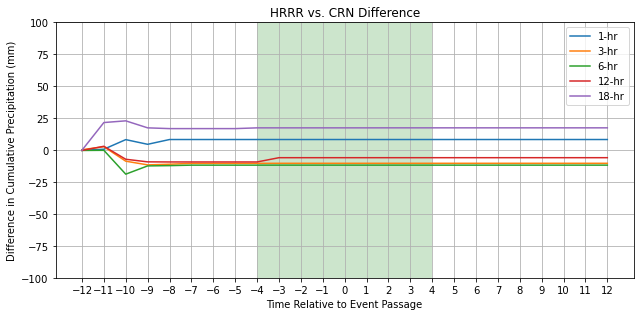

In [99]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_mon,label="1-hr")
plt.plot(hour,diff3_mon,label="3-hr")
plt.plot(hour,diff6_mon,label="6-hr")
plt.plot(hour,diff12_mon,label="12-hr")
plt.plot(hour,diff18_mon,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Holly Springs, MS: 2000 UTC 30 March 2022-2000 UTC 31 March 2022</font>

In [100]:
#1 hr hrrr:
with open('hrrr_f01_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2131:2156]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 1.052  2.262  3.503 19.075 37.976 39.343 39.343 39.344 39.344 39.708
 39.925 39.963 40.125 40.133 40.133 40.133 40.133 40.133 40.133 40.133
 40.133 40.133 40.133 40.133 40.133]


In [101]:
#Air Temp CRN:
with open('CRNH0203-2022-MS_Holly_Springs_4_N.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2131:2156]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 2.2  4.3  8.3 18.2 21.9 22.2 22.2 22.2 22.2 22.9 22.9 22.9 23.2 23.5
 23.5 23.5 23.5 23.5 23.5 23.5 23.5 23.5 23.5 23.5 23.5]


In [102]:
difference_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_hol.append(temp_i-temp_crn_i)

print(difference_hol)

[-1.1480000000000001, -2.0380000000000007, -4.797000000000001, 0.8749999999999964, 16.075999999999997, 17.142999999999994, 17.142999999999994, 17.14399999999999, 17.14399999999999, 16.80799999999999, 17.024999999999988, 17.062999999999985, 16.924999999999983, 16.632999999999985, 16.632999999999985, 16.632999999999985, 16.632999999999985, 16.632999999999985, 16.632999999999985, 16.632999999999985, 16.632999999999985, 16.632999999999985, 16.632999999999985, 16.632999999999985, 16.632999999999985]


In [103]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [104]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",holly1)

RSME 1-hr 48-hr HRRR vs CRN : 15.405357092907636


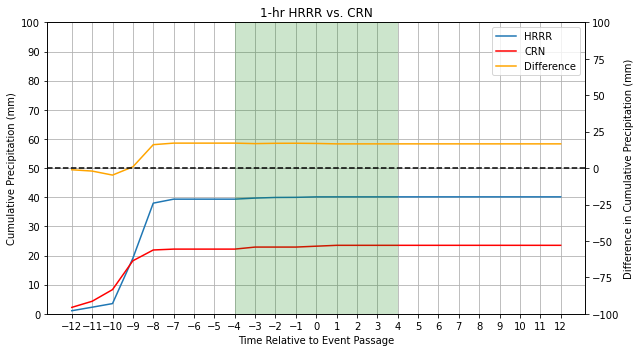

In [105]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_hol, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [106]:
#3 hr hrrr:
with open('hrrr_f03_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2129:2154]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     1.193  2.546  7.73  21.234 33.066 33.068 33.068 33.068 33.249
 33.328 33.328 33.422 33.567 33.567 33.567 33.567 33.567 33.567 33.567
 33.567 33.567 33.567 33.567 33.567]


In [107]:
diff3_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_hol.append(temp_i-temp_crn_i)

print(diff3_hol)

[-2.2, -3.1070000000000007, -5.7540000000000004, -10.470000000000002, -0.6660000000000004, 10.866, 10.868000000000002, 10.868000000000002, 10.868000000000002, 10.349, 10.428, 10.428, 10.222000000000001, 10.067000000000004, 10.067000000000004, 10.067000000000004, 10.067000000000004, 10.067000000000004, 10.067000000000004, 10.067000000000004, 10.067000000000004, 10.067000000000004, 10.067000000000004, 10.067000000000004, 10.067000000000004]


In [108]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [109]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",holly3)

RSME 3-hr 48-hr HRRR vs CRN : 9.539995744233854


In [110]:
#6 hr hrrr:
with open('hrrr_f06_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2126:2151]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[2.0000e-03 4.7860e+00 9.7210e+00 2.7593e+01 5.1529e+01 5.5667e+01
 5.5714e+01 5.5714e+01 5.5714e+01 5.6074e+01 5.6126e+01 5.6156e+01
 5.6359e+01 5.6424e+01 5.6424e+01 5.6424e+01 5.6424e+01 5.6424e+01
 5.6424e+01 5.6424e+01 5.6424e+01 5.6424e+01 5.6424e+01 5.6424e+01
 5.6424e+01]


In [111]:
diff6_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_hol.append(temp_i-temp_crn_i)

print(diff6_hol)

[-2.1980000000000004, 0.4859999999999989, 1.4209999999999994, 9.392999999999997, 29.628999999999994, 33.46699999999999, 33.51399999999999, 33.51399999999999, 33.51399999999999, 33.17399999999999, 33.225999999999985, 33.255999999999986, 33.15899999999999, 32.92399999999999, 32.92399999999999, 32.92399999999999, 32.92399999999999, 32.92399999999999, 32.92399999999999, 32.92399999999999, 32.92399999999999, 32.92399999999999, 32.92399999999999, 32.92399999999999, 32.92399999999999]


In [112]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [113]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",holly6)

RSME 6-hr 48-hr HRRR vs CRN : 30.252693690975676


In [114]:
#12 hr hrrr:
with open('hrrr_f12_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2120:2145]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[1.9000e-02 2.4100e-01 5.8280e+00 2.7243e+01 3.3701e+01 3.6859e+01
 3.6860e+01 3.6860e+01 3.6860e+01 3.8232e+01 3.8236e+01 3.8236e+01
 3.8239e+01 3.8240e+01 3.8240e+01 3.8240e+01 3.8240e+01 3.8240e+01
 3.8240e+01 3.8240e+01 3.8240e+01 3.8240e+01 3.8240e+01 3.8240e+01
 3.8240e+01]
25


In [115]:
diff12_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_hol.append(temp_i-temp_crn_i)

print(diff12_hol)

[-2.181, -4.059000000000001, -2.4720000000000013, 9.042999999999996, 11.800999999999998, 14.658999999999999, 14.659999999999997, 14.659999999999997, 14.659999999999997, 15.331999999999997, 15.335999999999995, 15.335999999999995, 15.038999999999994, 14.739999999999991, 14.739999999999991, 14.739999999999991, 14.739999999999991, 14.739999999999991, 14.739999999999991, 14.739999999999991, 14.739999999999991, 14.739999999999991, 14.739999999999991, 14.739999999999991, 14.739999999999991]


In [116]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [117]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",holly12)

RSME 12-hr 48-hr HRRR vs CRN : 13.633567829442146


In [118]:
#18 hr hrrr:
with open('hrrr_f18_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2114:2139]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.283  9.447 16.172 26.457 27.42  27.54  27.542 27.542 27.545 27.545
 27.615 27.669 27.67  27.67  27.67  27.67  27.67  27.67  27.67  27.67
 27.67  27.67  27.67  27.67  27.67 ]


In [119]:
diff18_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_hol.append(temp_i-temp_crn_i)

print(diff18_hol)

[-1.9170000000000003, 5.1469999999999985, 7.871999999999996, 8.256999999999994, 5.519999999999996, 5.339999999999996, 5.341999999999995, 5.341999999999995, 5.344999999999995, 4.644999999999996, 4.714999999999996, 4.768999999999995, 4.469999999999995, 4.169999999999995, 4.169999999999995, 4.169999999999995, 4.169999999999995, 4.169999999999995, 4.169999999999995, 4.169999999999995, 4.169999999999995, 4.169999999999995, 4.169999999999995, 4.169999999999995, 4.169999999999995]


In [120]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [121]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",holly18)

RSME 18-hr 48-hr HRRR vs CRN : 4.899551795827854


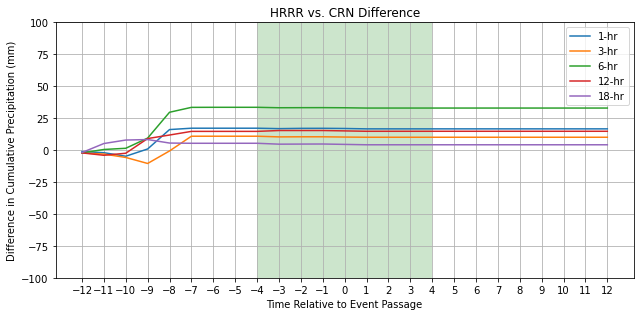

In [122]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_hol,label="1-hr")
plt.plot(hour,diff3_hol,label="3-hr")
plt.plot(hour,diff6_hol,label="6-hr")
plt.plot(hour,diff12_hol,label="12-hr")
plt.plot(hour,diff18_hol,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Newton, MS: 2000 UTC 30 March 2022-2000 UTC 31 March 2022</font>

In [123]:
#1 hr hrrr:
with open('hrrr_f01_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2131:2156]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.033  0.093  1.306 24.587 25.527 25.531 25.531 25.531
 25.531 25.531 25.531 25.531 25.531 25.531 25.531 25.531 25.531 25.531
 25.531 25.531 25.531 25.531 25.531]


In [124]:
#Air Temp CRN:
with open('CRNH0203-2022-MS_Newton_5_ENE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2131:2156]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.   0.   0.   1.  36.1 38.7 38.7 38.7 38.7 38.7 38.7 38.7 38.7
 38.7 38.7 38.7 38.7 38.7 38.7 38.7 38.7 38.7 38.7 38.7]


In [125]:
difference_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_new.append(temp_i-temp_crn_i)

print(difference_new)

[0.0, 0.0, 0.033, 0.093, 0.30600000000000005, -11.513000000000002, -13.173000000000002, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169, -13.169]


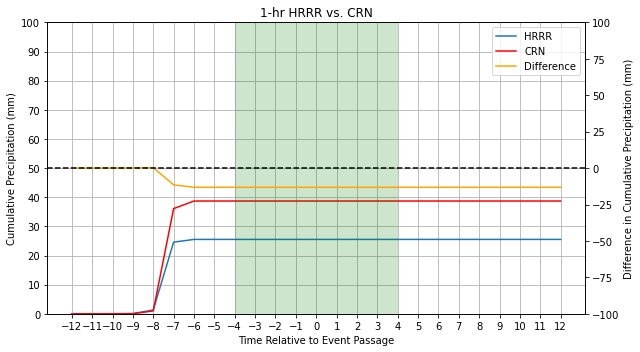

In [126]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_new, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [127]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [128]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",newtonms1)

RSME 1-hr 48-hr HRRR vs CRN : 11.709460397473489


In [129]:
#3 hr hrrr:
with open('hrrr_f03_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2129:2154]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 2.0000e-03 3.0000e-03 1.6660e+00 1.6770e+00 3.0440e+00
 3.7299e+01 3.7319e+01 3.7319e+01 3.7319e+01 3.7319e+01 3.7319e+01
 3.7319e+01 3.7324e+01 3.7324e+01 3.7324e+01 3.7324e+01 3.7324e+01
 3.7324e+01 3.7324e+01 3.7324e+01 3.7324e+01 3.7324e+01 3.7324e+01
 3.7324e+01]


In [130]:
diff3_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_new.append(temp_i-temp_crn_i)

print(diff3_new)

[0.0, 0.002, 0.003, 1.666, 0.6769999999999998, -33.056000000000004, -1.4010000000000034, -1.3810000000000002, -1.3810000000000002, -1.3810000000000002, -1.3810000000000002, -1.3810000000000002, -1.3810000000000002, -1.3759999999999977, -1.3759999999999977, -1.3759999999999977, -1.3759999999999977, -1.3759999999999977, -1.3759999999999977, -1.3759999999999977, -1.3759999999999977, -1.3759999999999977, -1.3759999999999977, -1.3759999999999977, -1.3759999999999977]


In [131]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [132]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",newtonms3)

RSME 3-hr 48-hr HRRR vs CRN : 6.729217823789033


In [133]:
#6 hr hrrr:
with open('hrrr_f06_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2126:2151]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.     0.     0.215 38.852 47.023 47.023 47.023 47.023
 47.023 47.023 47.023 47.023 47.023 47.023 47.023 47.023 47.023 47.023
 47.023 47.023 47.023 47.023 47.023]


In [134]:
diff6_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_new.append(temp_i-temp_crn_i)

print(diff6_new)

[0.0, 0.0, 0.0, 0.0, -0.785, 2.7520000000000024, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323, 8.323]


In [135]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [136]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",newtonms6)

RSME 6-hr 48-hr HRRR vs CRN : 7.278362398232174


In [137]:
#12 hr hrrr:
with open('hrrr_f12_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2120:2145]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.     0.     0.06  25.544 29.902 30.691 30.691 30.691
 30.691 30.691 30.691 30.691 30.691 30.694 30.698 30.698 30.698 30.698
 30.698 30.698 30.698 30.698 30.698]
25


In [138]:
diff12_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_new.append(temp_i-temp_crn_i)

print(diff12_new)

[0.0, 0.0, 0.0, 0.0, -0.94, -10.556000000000001, -8.798000000000002, -8.009, -8.009, -8.009, -8.009, -8.009, -8.009, -8.009, -8.009, -8.006, -8.001999999999999, -8.001999999999999, -8.001999999999999, -8.001999999999999, -8.001999999999999, -8.001999999999999, -8.001999999999999, -8.001999999999999, -8.001999999999999]


In [139]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [140]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",newtonms12)

RSME 12-hr 48-hr HRRR vs CRN : 7.330086657059383


In [141]:
#18 hr hrrr:
with open('hrrr_f18_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2114:2139]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.     0.834 12.553 21.381 23.964 24.059 24.059 24.059
 24.066 24.103 24.151 24.151 24.151 24.164 24.177 24.177 24.177 24.178
 24.178 24.178 24.178 24.178 24.178]


In [142]:
diff18_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_new.append(temp_i-temp_crn_i)

print(diff18_new)

[0.0, 0.0, 0.0, 0.834, 11.552999999999999, -14.719000000000001, -14.736000000000004, -14.641000000000005, -14.641000000000005, -14.641000000000005, -14.634000000000004, -14.597000000000005, -14.549000000000007, -14.549000000000007, -14.549000000000007, -14.536000000000005, -14.523000000000003, -14.523000000000003, -14.523000000000003, -14.522000000000002, -14.522000000000002, -14.522000000000002, -14.522000000000002, -14.522000000000002, -14.522000000000002]


In [143]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [144]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",newtonms18)

RSME 18-hr 48-hr HRRR vs CRN : 13.240344436607383


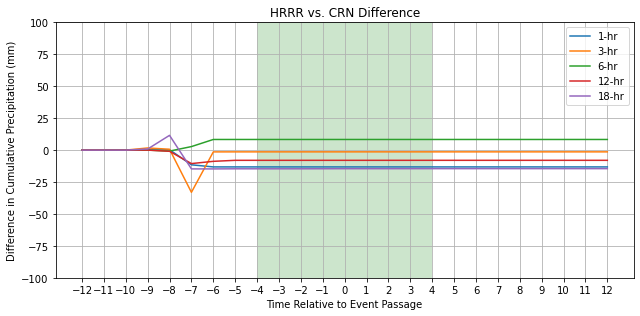

In [145]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_new,label="1-hr")
plt.plot(hour,diff3_new,label="3-hr")
plt.plot(hour,diff6_new,label="6-hr")
plt.plot(hour,diff12_new,label="12-hr")
plt.plot(hour,diff18_new,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Gainesville, AL: 2300 UTC 30 March 2022-2300 UTC 31 March 2022</font>

In [146]:
#1 hr hrrr:
with open('hrrr_f01_Gainesville_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2134:2159]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[2.0000e-03 2.1000e-01 1.0770e+00 2.2560e+00 1.5995e+01 1.7355e+01
 1.7358e+01 1.7358e+01 1.7358e+01 1.7358e+01 1.7358e+01 1.7358e+01
 1.7358e+01 1.7358e+01 1.7358e+01 1.7358e+01 1.7358e+01 1.7358e+01
 1.7358e+01 1.7358e+01 1.7358e+01 1.7358e+01 1.7358e+01 1.7358e+01
 1.7358e+01]


In [147]:
#Air Temp CRN:
with open('CRNH0203-2022-AL_Gainesville_2_NE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2134:2159]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.4  2.7 10.  24.5 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4
 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4]


In [148]:
difference_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_gai.append(temp_i-temp_crn_i)

print(difference_gai)

[0.002, -0.19000000000000003, -1.6229999999999998, -7.744, -8.504999999999999, -8.044999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998, -8.041999999999998]


In [149]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [150]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",gainesville1)

RSME 1-hr 48-hr HRRR vs CRN : 7.5590960702983505


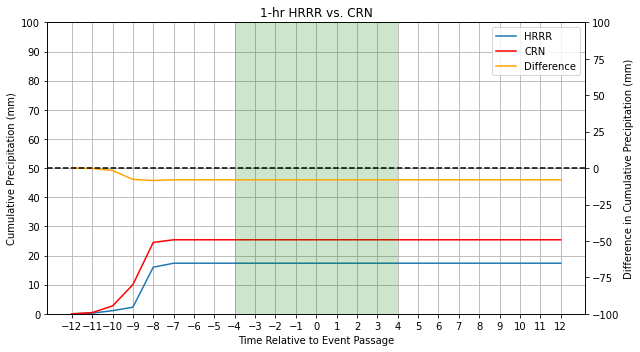

In [151]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_gai, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [152]:
#3 hr hrrr:
with open('hrrr_f03_Gainesville_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2132:2157]
    temp=np.cumsum(temp)
#     i = temp.index(9999.0)
#     temp= temp[:i]+[]+temp[i+1:]
    
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 2.0000e-03 3.3000e-02 1.8980e+00 3.7448e+01 3.9114e+01
 3.9114e+01 3.9114e+01 3.9114e+01 3.9114e+01 3.9114e+01 3.9114e+01
 3.9114e+01 3.9114e+01 3.9114e+01 3.9114e+01 3.9114e+01 3.9114e+01
 3.9114e+01 3.9114e+01 3.9114e+01 3.9114e+01 3.9114e+01 3.9114e+01
 3.9114e+01]


In [153]:
# temp[21]=0
# temp=np.cumsum(temp)
# print(temp)
# print(len(temp))

In [154]:
diff3_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_gai.append(temp_i-temp_crn_i)

print(diff3_gai)

[0.0, -0.398, -2.667, -8.102, 12.948, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999, 13.713999999999999]


In [155]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",gainesville3)

RSME 3-hr 48-hr HRRR vs CRN : 12.652336260153696


In [156]:
#6 hr hrrr:
with open('hrrr_f06_Gainesville_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2129:2154]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[4.0000e-03 5.0000e-03 1.9600e-01 1.8423e+01 4.5766e+01 5.0013e+01
 5.0017e+01 5.0017e+01 5.0017e+01 5.0017e+01 5.0017e+01 5.0017e+01
 5.0017e+01 5.0017e+01 5.0017e+01 5.0017e+01 5.0017e+01 5.0017e+01
 5.0017e+01 5.0017e+01 5.0017e+01 5.0017e+01 5.0017e+01 5.0017e+01
 5.0017e+01]


In [157]:
diff6_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_gai.append(temp_i-temp_crn_i)

print(diff6_gai)

[0.004, -0.395, -2.5039999999999996, 8.423000000000002, 21.266000000000005, 24.613000000000007, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004, 24.617000000000004]


In [158]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [159]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",gainesville6)

RSME 6-hr 48-hr HRRR vs CRN : 22.493868144007603


In [160]:
#12 hr hrrr:
with open('hrrr_f12_Gainesville_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2123:2148]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[ 0.     0.197  1.435 30.257 34.512 36.645 36.645 36.645 36.645 36.646
 36.655 36.655 36.655 36.655 36.655 36.655 36.655 36.655 36.655 36.655
 36.655 36.655 36.655 36.655 36.655]
25


In [161]:
diff12_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_gai.append(temp_i-temp_crn_i)

print(diff12_gai)

[0.0, -0.203, -1.2649999999999997, 20.256999999999998, 10.012, 11.245000000000005, 11.245000000000005, 11.245000000000005, 11.245000000000005, 11.246000000000002, 11.255000000000003, 11.255000000000003, 11.255000000000003, 11.255000000000003, 11.255000000000003, 11.255000000000003, 11.255000000000003, 11.255000000000003, 11.255000000000003, 11.255000000000003, 11.255000000000003, 11.255000000000003, 11.255000000000003, 11.255000000000003, 11.255000000000003]


In [162]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [163]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",gainesville12)

RSME 12-hr 48-hr HRRR vs CRN : 11.035625252789261


In [164]:
#18 hr hrrr:
with open('hrrr_f18_Gainesville_AL (1).txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2117:2142]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 1.4000e-02 4.7130e+00 2.4133e+01 2.5820e+01 2.6935e+01
 2.6935e+01 2.6935e+01 2.6935e+01 2.6938e+01 2.6952e+01 2.6952e+01
 2.6952e+01 2.6952e+01 2.6952e+01 2.6952e+01 2.6952e+01 2.6952e+01
 2.6952e+01 2.6952e+01 2.6952e+01 2.6952e+01 2.6952e+01 2.6952e+01
 2.6952e+01]


In [165]:
diff18_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_gai.append(temp_i-temp_crn_i)

print(diff18_gai)

[0.0, -0.386, 2.0130000000000003, 14.133000000000003, 1.3200000000000038, 1.5350000000000037, 1.5350000000000037, 1.5350000000000037, 1.5350000000000037, 1.5380000000000038, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032, 1.5520000000000032]


In [166]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [167]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",gainesville18)

RSME 18-hr 48-hr HRRR vs CRN : 3.1850033469370183


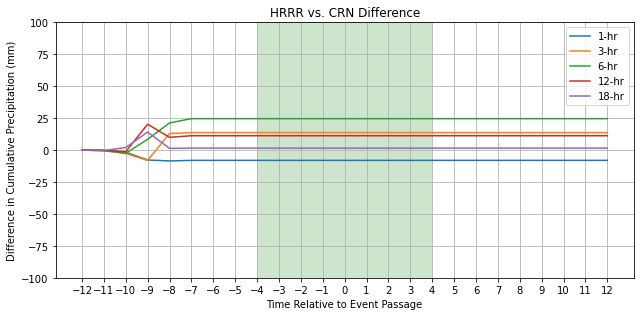

In [168]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_gai,label="1-hr")
plt.plot(hour,diff3_gai,label="3-hr")
plt.plot(hour,diff6_gai,label="6-hr")
plt.plot(hour,diff12_gai,label="12-hr")
plt.plot(hour,diff18_gai,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Fairhope, AL: 0100 UTC 31 March 2022-0100 UTC 1 April 2022</font>

In [169]:
#1 hr hrrr:
with open('hrrr_f01_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2136:2161]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[1.000e-03 1.000e-03 2.000e-03 2.400e-02 7.600e-02 5.876e+00 5.898e+00
 5.952e+00 5.964e+00 5.991e+00 5.992e+00 5.992e+00 5.992e+00 5.992e+00
 5.992e+00 5.992e+00 5.992e+00 5.992e+00 5.992e+00 5.992e+00 5.992e+00
 5.992e+00 5.992e+00 5.992e+00 5.992e+00]


In [170]:
#Air Temp CRN:
with open('CRNH0203-2022-AL_Fairhope_3_NE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2136:2161]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.   0.   0.  22.1 25.3 25.3 25.5 25.5 25.5 25.5 25.5 25.5 25.5
 25.5 25.5 25.5 25.5 25.5 25.5 25.5 25.5 25.5 25.5 25.5]


In [171]:
difference_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_fai.append(temp_i-temp_crn_i)

print(difference_fai)

[0.001, 0.001, 0.002, 0.024, -22.024, -19.424, -19.402, -19.548000000000002, -19.536, -19.509, -19.508, -19.508, -19.508, -19.508, -19.508, -19.508, -19.508, -19.508, -19.508, -19.508, -19.508, -19.508, -19.508, -19.508, -19.508]


In [172]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [173]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",fairhope1)

RSME 1-hr 48-hr HRRR vs CRN : 17.99066222127468


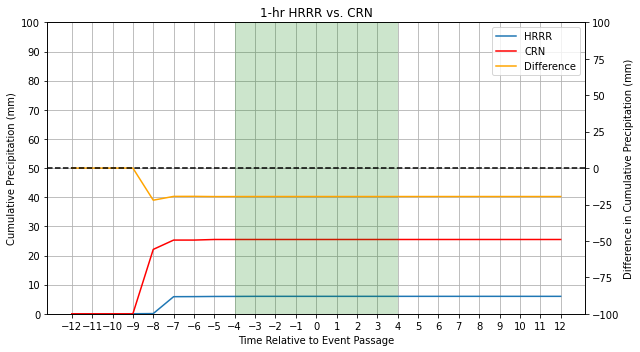

In [174]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_fai, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [175]:
#3 hr hrrr:
with open('hrrr_f03_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2134:2159]
    #temp[21]=0
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 9.0000e-03 9.0000e-03 9.0000e-03 9.0000e-03 1.7589e+01
 3.9157e+01 3.9158e+01 3.9167e+01 3.9168e+01 3.9168e+01 3.9168e+01
 3.9168e+01 3.9168e+01 3.9168e+01 3.9168e+01 3.9168e+01 3.9168e+01
 3.9168e+01 3.9168e+01 3.9168e+01 3.9168e+01 3.9168e+01 3.9168e+01
 3.9168e+01]


In [176]:
diff3_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_fai.append(temp_i-temp_crn_i)

print(diff3_fai)

[0.0, 0.009, 0.009, 0.009, -22.091, -7.711000000000002, 13.856999999999996, 13.657999999999994, 13.666999999999994, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992, 13.667999999999992]


In [177]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [178]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",fairhope3)

RSME 3-hr 48-hr HRRR vs CRN : 12.809127887565175


In [179]:
#6 hr hrrr:
with open('hrrr_f06_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2131:2156]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[6.0000e-03 6.0000e-03 6.0000e-03 1.4600e+00 1.4750e+00 2.2230e+00
 4.1032e+01 4.1337e+01 4.1399e+01 4.1399e+01 4.1400e+01 4.1400e+01
 4.1400e+01 4.1400e+01 4.1400e+01 4.1400e+01 4.1400e+01 4.1400e+01
 4.1400e+01 4.1400e+01 4.1400e+01 4.1400e+01 4.1400e+01 4.1400e+01
 4.1400e+01]


In [180]:
diff6_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_fai.append(temp_i-temp_crn_i)

print(diff6_fai)

[0.006, 0.006, 0.006, 1.46, -20.625, -23.077, 15.731999999999996, 15.836999999999996, 15.898999999999994, 15.898999999999994, 15.899999999999991, 15.899999999999991, 15.899999999999991, 15.899999999999991, 15.899999999999991, 15.899999999999991, 15.899999999999991, 15.899999999999991, 15.899999999999991, 15.899999999999991, 15.899999999999991, 15.899999999999991, 15.899999999999991, 15.899999999999991, 15.899999999999991]


In [181]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [182]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",fairhope6)

RSME 6-hr 48-hr HRRR vs CRN : 15.173770865542942


In [183]:
#12 hr hrrr:
with open('hrrr_f12_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2125:2150]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     4.343  4.55   4.811 14.191 17.893 19.111 19.783 19.784
 19.784 19.784 19.784 19.784 19.784 19.784 19.784 19.784 19.784 19.784
 19.784 19.784 19.784 19.784 19.784]
25


In [184]:
diff12_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_fai.append(temp_i-temp_crn_i)

print(diff12_fai)

[0.0, 0.0, 4.343, 4.55, -17.289, -11.109, -7.407, -6.388999999999999, -5.716999999999999, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975, -5.7159999999999975]


In [185]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [186]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",fairhope12)

RSME 12-hr 48-hr HRRR vs CRN : 6.672370211551513


In [187]:
#18 hr hrrr:
with open('hrrr_f18_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2119:2144]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.000e+00 3.000e-03 5.390e-01 5.390e-01 5.500e-01 9.970e-01 7.498e+00
 7.706e+00 7.706e+00 7.706e+00 7.706e+00 7.706e+00 7.706e+00 7.706e+00
 7.706e+00 7.706e+00 7.706e+00 7.706e+00 7.706e+00 7.706e+00 7.706e+00
 7.706e+00 7.706e+00 7.706e+00 7.706e+00]


In [188]:
diff18_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_fai.append(temp_i-temp_crn_i)

print(diff18_fai)

[0.0, 0.003, 0.539, 0.539, -21.55, -24.303, -17.802, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794, -17.794]


In [189]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [190]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",fairhope18)

RSME 18-hr 48-hr HRRR vs CRN : 16.81880663067389


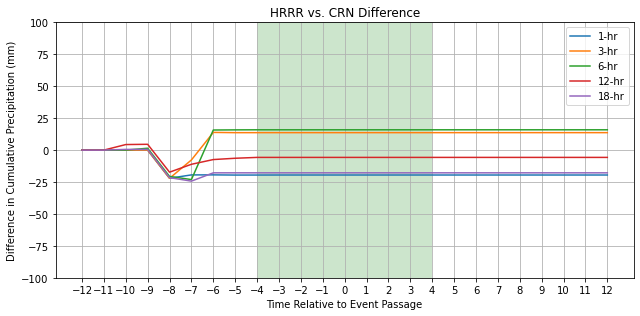

In [191]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_fai,label="1-hr")
plt.plot(hour,diff3_fai,label="3-hr")
plt.plot(hour,diff6_fai,label="6-hr")
plt.plot(hour,diff12_fai,label="12-hr")
plt.plot(hour,diff18_fai,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Selma, AL: 0100 UTC 31 March 2022-0100 UTC 1 April 2022</font>

In [192]:
#1 hr hrrr:
with open('hrrr_f01_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2136:2161]
#     temp[17]=0
#     temp[18]=0
#     temp[19]=0
#     temp[20]=0
    temp=np.cumsum(temp)
    
#Air Temp CRN:
with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2136:2161]
#     temp_crn[17]=0
#     temp_crn[18]=0
#     temp_crn[19]=0
#     temp_crn[20]=0
    temp_crn=np.cumsum(temp_crn)
    print(temp)
    print(len(temp))
    print(temp_crn)
    print(len(temp_crn))
#full time period is [2015:2112]
difference_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_sel.append(temp_i-temp_crn_i)

print(difference_sel)
print(len(difference_sel))

[0.0000e+00 3.3000e-02 2.8900e-01 8.6400e-01 1.6631e+01 2.7611e+01
 3.5986e+01 3.7266e+01 3.7274e+01 3.7274e+01 3.7274e+01 3.7274e+01
 3.7274e+01 3.7274e+01 3.7274e+01 3.7274e+01 3.7274e+01 3.7274e+01
 3.7274e+01 3.7274e+01 3.7274e+01 3.7274e+01 3.7274e+01 3.7274e+01
 3.7274e+01]
25
[ 0.   0.2  4.4 20.8 27.  29.7 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1
 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1]
25
[0.0, -0.167, -4.111000000000001, -19.935999999999996, -10.368999999999996, -2.088999999999995, 5.88600000000001, 7.166000000000011, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014, 7.174000000000014]
25


In [193]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# difference_sel[17]=None
# difference_sel[18]=None
# difference_sel[19]=None
# difference_sel[20]=None
# print(temp)
# print(temp_crn)
# print(difference_sel)


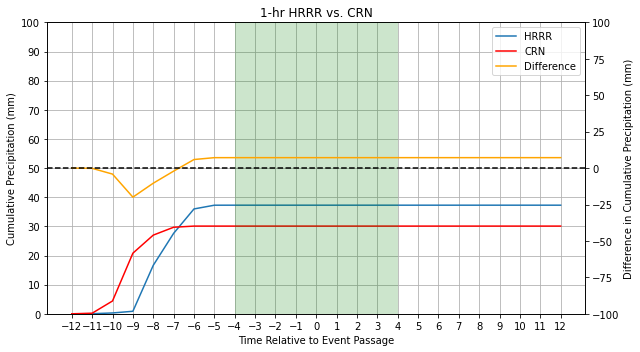

In [194]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_sel, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [195]:
#1 hr hrrr:
with open('hrrr_f03_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2134:2159]
    #temp[21]=0
    print(temp)
    temp=np.cumsum(temp)
    
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[12] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]
#     #temp_crn[21]=0

#     temp_crn=np.cumsum(temp_crn)
    print(temp)
    print(len(temp))
    print(temp_crn)
    print(len(temp_crn))
#full time period is [2015:2112]
diff3_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_sel.append(temp_i-temp_crn_i)

print(diff3_sel)
print(len(diff3_sel))

[0.0, 0.0, 0.02, 0.14, 2.624, 29.461, 3.424, 0.326, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0, 0.004, 0.009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0000e+00 0.0000e+00 2.0000e-02 1.6000e-01 2.7840e+00 3.2245e+01
 3.5669e+01 3.5995e+01 3.5995e+01 3.5995e+01 3.5995e+01 3.5995e+01
 3.5996e+01 3.5996e+01 3.6000e+01 3.6009e+01 3.6009e+01 3.6009e+01
 3.6009e+01 3.6009e+01 3.6009e+01 3.6009e+01 3.6009e+01 3.6009e+01
 3.6009e+01]
25
[ 0.   0.2  4.4 20.8 27.  29.7 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1
 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1]
25
[0.0, -0.2, -4.380000000000001, -20.639999999999997, -24.215999999999998, 2.5450000000000017, 5.569000000000003, 5.895000000000003, 5.895000000000003, 5.895000000000003, 5.895000000000003, 5.895000000000003, 5.896000000000001, 5.896000000000001, 5.899999999999999, 5.908999999999999, 5.908999999999999, 5.908999999999999, 5.908999999999999, 5.908999999999999, 5.908999999999999, 5.908999999999999, 5.908999999999999, 5.908999999999999, 5.9089

In [196]:
# temp[21]=None
# temp_crn[21]=None
# diff3_sel[21]=None

# print(temp)
# print(temp_crn)
# print(diff3_sel)

In [197]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [198]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",selma3)

In [199]:
#6 hr hrrr:
with open('hrrr_f06_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2131:2156]
    temp=np.cumsum(temp)
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[12] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]
#     temp_crn=np.cumsum(temp_crn)
    print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff6_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_sel.append(temp_i-temp_crn_i)

print(diff6_sel)
print(len(diff6_sel))

[ 0.     0.     0.057  0.248  0.858 41.715 47.355 47.355 47.355 47.355
 47.356 47.356 47.356 47.356 47.356 47.356 47.356 47.356 47.356 47.356
 47.356 47.356 47.356 47.356 47.356]
[0.0, -0.2, -4.343, -20.551999999999996, -26.141999999999996, 12.015, 17.255000000000003, 17.255000000000003, 17.255000000000003, 17.255000000000003, 17.256, 17.256, 17.256, 17.256, 17.256, 17.256, 17.256, 17.256, 17.256, 17.256, 17.256, 17.256, 17.256, 17.256, 17.256]
25


In [200]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# difference6[17]=None
# difference6[18]=None
# difference6[19]=None
# difference6[20]=None
# print(temp)
# print(temp_crn)
# print(difference6)

In [201]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [202]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",selma6)

In [203]:
#12 hr hrrr:
with open('hrrr_f12_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2125:2150]
    temp=np.cumsum(temp)
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[12] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]
#     temp_crn=np.cumsum(temp_crn)
    print(temp)
    print(len(temp))
    print(temp_crn)
    print(len(temp_crn))
#full time period is [2015:2112]
diff12_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_sel.append(temp_i-temp_crn_i)

print(diff12_sel)

[ 0.     0.168  0.18   3.535 33.412 35.15  35.437 35.457 35.457 35.457
 35.457 35.457 35.457 35.457 35.457 35.457 35.457 35.457 35.457 35.457
 35.457 35.457 35.457 35.457 35.457]
25
[ 0.   0.2  4.4 20.8 27.  29.7 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1
 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1]
25
[0.0, -0.032, -4.220000000000001, -17.264999999999997, 6.412000000000003, 5.450000000000003, 5.337000000000003, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006, 5.357000000000006]


In [204]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# difference12[17]=None
# difference12[18]=None
# difference12[19]=None
# difference12[20]=None
# print(temp)
# print(temp_crn)
# print(difference12)

In [205]:
# difference12 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference12.append(temp_i-temp_crn_i)

# print(difference12)

In [206]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [207]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",selma12)

In [208]:
#18 hr hrrr:
with open('hrrr_f18_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2119:2144]
    temp=np.cumsum(temp)
#Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[12] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]
#     temp_crn=np.cumsum(temp_crn)
    print(temp)
    print(len(temp))
    print(temp_crn)
    print(len(temp_crn))
#full time period is [2015:2112]
diff18_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_sel.append(temp_i-temp_crn_i)

print(diff18_sel)

[1.0000e-03 1.0000e-03 1.0000e-03 3.9680e+00 4.5001e+01 4.7936e+01
 4.8187e+01 4.8187e+01 4.8187e+01 4.8187e+01 4.8187e+01 4.8187e+01
 4.8191e+01 4.8191e+01 4.8191e+01 4.8191e+01 4.8191e+01 4.8191e+01
 4.8191e+01 4.8191e+01 4.8191e+01 4.8191e+01 4.8191e+01 4.8191e+01
 4.8191e+01]
25
[ 0.   0.2  4.4 20.8 27.  29.7 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1
 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1 30.1]
25
[0.001, -0.199, -4.399, -16.831999999999997, 18.00100000000001, 18.23600000000001, 18.08700000000001, 18.08700000000001, 18.08700000000001, 18.08700000000001, 18.08700000000001, 18.08700000000001, 18.091000000000008, 18.091000000000008, 18.091000000000008, 18.091000000000008, 18.091000000000008, 18.091000000000008, 18.091000000000008, 18.091000000000008, 18.091000000000008, 18.091000000000008, 18.091000000000008, 18.091000000000008, 18.091000000000008]


In [209]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# difference18[17]=None
# difference18[18]=None
# difference18[19]=None
# difference18[20]=None
# print(temp)
# print(temp_crn)
# print(difference18)

In [210]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [211]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",selma18)

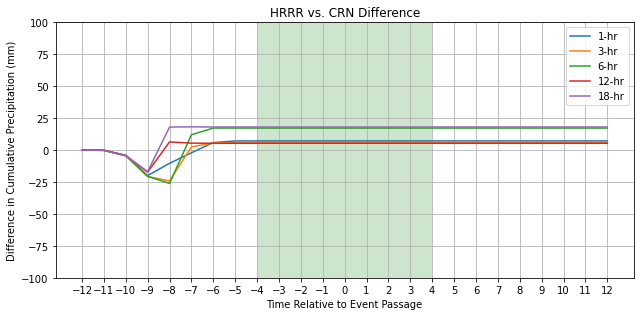

In [212]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_sel,label="1-hr")
plt.plot(hour,diff3_sel,label="3-hr")
plt.plot(hour,diff6_sel,label="6-hr")
plt.plot(hour,diff12_sel,label="12-hr")
plt.plot(hour,diff18_sel,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Bowling Green, KY: 0100 UTC 31 March 2022-0100 UTC 1 April 2022</font>

In [213]:
#1 hr hrrr:
with open('hrrr_f01_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2136:2161]
    temp[6]=0
    temp[7]=0
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[2.0000e-03 1.4300e-01 1.8540e+00 7.3680e+00 1.1104e+01 1.1114e+01
 1.1114e+01 1.1114e+01 1.1114e+01 1.1335e+01 1.1341e+01 1.1341e+01
 1.1341e+01 1.1341e+01 1.1341e+01 1.1341e+01 1.1342e+01 1.1344e+01
 1.1344e+01 1.1344e+01 1.1344e+01 1.1344e+01 1.1344e+01 1.1345e+01
 1.1348e+01]


In [214]:
#Air Temp CRN:
with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2136:2161]
    temp_crn[6]=0
    temp_crn[7]=0
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.7  8.1 15.2 19.  19.  19.  19.  19.  19.3 19.5 19.5 19.5 19.5
 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5]


In [215]:
difference_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_bow.append(temp_i-temp_crn_i)

print(difference_bow)

[0.002, -0.5569999999999999, -6.2459999999999996, -7.831999999999999, -7.895999999999999, -7.885999999999999, -7.885999999999999, -7.885999999999999, -7.885999999999999, -7.965, -8.158999999999999, -8.158999999999999, -8.158999999999999, -8.158999999999999, -8.158999999999999, -8.158999999999999, -8.158, -8.155999999999999, -8.155999999999999, -8.155999999999999, -8.155999999999999, -8.155999999999999, -8.155999999999999, -8.155, -8.152]


In [216]:
temp[6]=None
temp[7]=None

temp_crn[6]=None
temp_crn[7]=None

difference_bow[6]=None
difference_bow[7]=None
print(temp)
print(temp_crn)
print(difference_bow)

[2.0000e-03 1.4300e-01 1.8540e+00 7.3680e+00 1.1104e+01 1.1114e+01
        nan        nan 1.1114e+01 1.1335e+01 1.1341e+01 1.1341e+01
 1.1341e+01 1.1341e+01 1.1341e+01 1.1341e+01 1.1342e+01 1.1344e+01
 1.1344e+01 1.1344e+01 1.1344e+01 1.1344e+01 1.1344e+01 1.1345e+01
 1.1348e+01]
[ 0.   0.7  8.1 15.2 19.  19.   nan  nan 19.  19.3 19.5 19.5 19.5 19.5
 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5]
[0.002, -0.5569999999999999, -6.2459999999999996, -7.831999999999999, -7.895999999999999, -7.885999999999999, None, None, -7.885999999999999, -7.965, -8.158999999999999, -8.158999999999999, -8.158999999999999, -8.158999999999999, -8.158999999999999, -8.158999999999999, -8.158, -8.155999999999999, -8.155999999999999, -8.155999999999999, -8.155999999999999, -8.155999999999999, -8.155999999999999, -8.155, -8.152]


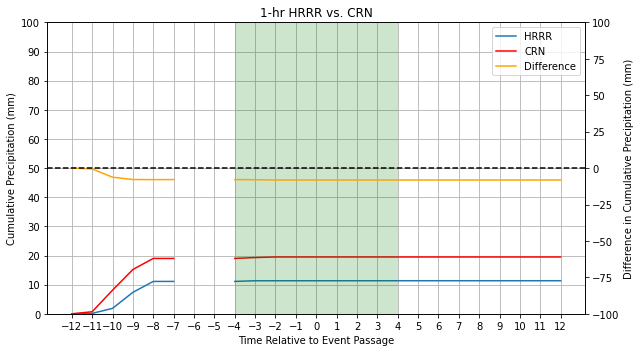

In [217]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_bow, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [218]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [219]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
bowling1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",bowling1)

RSME 1-hr 48-hr HRRR vs CRN : nan


In [220]:
#3 hr hrrr:
with open('hrrr_f03_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2134:2159]
    temp[6]=0
    temp[7]=0
    temp=np.cumsum(temp)
    temp[6]=None
    temp[7]=None
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 4.0000e-03 4.9400e-01 3.2290e+00 9.3010e+00 9.5350e+00
        nan        nan 9.5370e+00 1.1583e+01 1.1642e+01 1.1642e+01
 1.1642e+01 1.1642e+01 1.1642e+01 1.1642e+01 1.1642e+01 1.1642e+01
 1.1642e+01 1.1642e+01 1.1642e+01 1.1642e+01 1.1649e+01 1.1650e+01
 1.1651e+01]


In [221]:
#Air Temp CRN:
with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2136:2161]
    temp_crn[6]=0
    temp_crn[7]=0
    temp_crn=np.cumsum(temp_crn)
    temp_crn[6]=None
    temp_crn[7]=None
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.7  8.1 15.2 19.  19.   nan  nan 19.  19.3 19.5 19.5 19.5 19.5
 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5]


In [222]:
diff3_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_bow.append(temp_i-temp_crn_i)

print(diff3_bow)

[0.0, -0.696, -7.606, -11.971, -9.699, -9.465, nan, nan, -9.463, -7.7170000000000005, -7.8580000000000005, -7.8580000000000005, -7.8580000000000005, -7.8580000000000005, -7.8580000000000005, -7.8580000000000005, -7.8580000000000005, -7.8580000000000005, -7.8580000000000005, -7.8580000000000005, -7.8580000000000005, -7.8580000000000005, -7.851000000000001, -7.850000000000001, -7.849000000000002]


In [223]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [224]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
bowling3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",bowling3)

RSME 3-hr 48-hr HRRR vs CRN : nan


In [225]:
#6 hr hrrr:
with open('hrrr_f06_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2131:2156]
    temp[6]=0
    temp[7]=0
    temp=np.cumsum(temp)
    temp[6]=None
    temp[7]=None
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 7.0000e-03 8.8500e-01 3.5720e+00 1.8252e+01 1.8268e+01
        nan        nan 1.8268e+01 1.8849e+01 1.8993e+01 1.8995e+01
 1.8995e+01 1.8995e+01 1.8995e+01 1.8995e+01 1.8995e+01 1.8995e+01
 1.8995e+01 1.8995e+01 1.8995e+01 1.8996e+01 1.9010e+01 1.9228e+01
 1.9528e+01]


In [226]:
#Air Temp CRN:
with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2136:2161]
    temp_crn[6]=0
    temp_crn[7]=0
    temp_crn=np.cumsum(temp_crn)
    temp_crn[6]=None
    temp_crn[7]=None
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.7  8.1 15.2 19.  19.   nan  nan 19.  19.3 19.5 19.5 19.5 19.5
 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5 19.5]


In [227]:
diff6_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_bow.append(temp_i-temp_crn_i)

print(diff6_bow)

[0.0, -0.693, -7.215, -11.628, -0.7480000000000011, -0.7320000000000029, nan, nan, -0.7320000000000029, -0.45100000000000406, -0.507000000000005, -0.5050000000000061, -0.5050000000000061, -0.5050000000000061, -0.5050000000000061, -0.5050000000000061, -0.5050000000000061, -0.5050000000000061, -0.5050000000000061, -0.5050000000000061, -0.5050000000000061, -0.5040000000000049, -0.49000000000000554, -0.27200000000000557, 0.02799999999999514]


In [228]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [229]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",bowling6)

In [230]:
#12 hr hrrr:
with open('hrrr_f12_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2125:2150]
    temp[6]=0
    temp[7]=0
    temp=np.cumsum(temp)
    temp[6]=None
    temp[7]=None
    print(temp)
#full time period is [2015:2112]

[ 0.     0.084  0.547  9.146 11.084 13.279    nan    nan 13.279 13.28
 13.286 13.286 13.478 13.531 13.534 13.534 13.551 13.553 13.553 13.557
 13.557 13.564 13.579 13.622 14.213]


In [231]:
diff12_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_bow.append(temp_i-temp_crn_i)

print(diff12_bow)

[0.0, -0.616, -7.553, -6.0539999999999985, -7.915999999999999, -5.720999999999998, nan, nan, -5.720999999999998, -6.02, -6.213999999999999, -6.213999999999999, -6.0219999999999985, -5.968999999999998, -5.9659999999999975, -5.9659999999999975, -5.948999999999998, -5.946999999999997, -5.946999999999997, -5.942999999999998, -5.942999999999998, -5.935999999999998, -5.920999999999998, -5.877999999999998, -5.286999999999999]


In [232]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [233]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
bowling12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",bowling12)

RSME 12-hr 48-hr HRRR vs CRN : nan


In [234]:
#18 hr hrrr:
with open('hrrr_f18_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2119:2144]
    temp[6]=0
    temp[7]=0
    temp=np.cumsum(temp)
    temp[6]=None
    temp[7]=None
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.127  3.727 20.756 23.536 24.23  24.232    nan    nan 24.233 24.234
 24.234 24.235 24.235 24.235 24.237 24.294 24.295 24.297 24.313 24.313
 24.315 24.315 24.402 24.465 24.783]


In [235]:
diff18_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_bow.append(temp_i-temp_crn_i)

print(diff18_bow)

[0.127, 3.027, 12.656, 8.336000000000002, 5.23, 5.231999999999999, nan, nan, 5.2330000000000005, 4.934000000000001, 4.734000000000002, 4.735000000000003, 4.735000000000003, 4.735000000000003, 4.737000000000002, 4.7940000000000005, 4.795000000000002, 4.797000000000001, 4.812999999999999, 4.812999999999999, 4.814999999999998, 4.814999999999998, 4.9019999999999975, 4.964999999999996, 5.282999999999998]


In [236]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [237]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
bowling18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",bowling18)

RSME 18-hr 48-hr HRRR vs CRN : nan


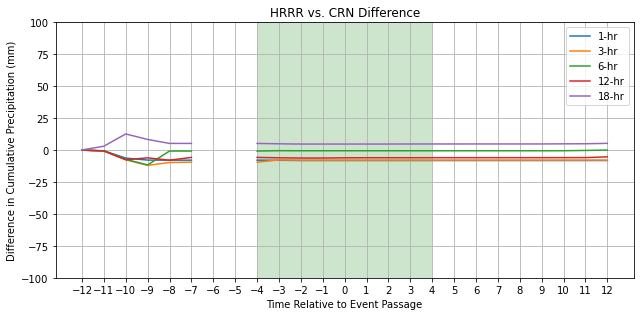

In [238]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_bow,label="1-hr")
plt.plot(hour,diff3_bow,label="3-hr")
plt.plot(hour,diff6_bow,label="6-hr")
plt.plot(hour,diff12_bow,label="12-hr")
plt.plot(hour,diff18_bow,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Gadsden, AL: 0200 UTC 31 March 2022-0200 UTC 1 April 2022</font>

In [239]:
# #1 hr hrrr:
# with open('hrrr_f01_Gadsden_AL.txt') as f:
#     lst=[line.split()[2] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[2137:2162]
#     temp=np.cumsum(temp)
#     #temp=temp[2015:2063]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [240]:
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Gadsden_19_N.txt') as f:
#     lst=[line.split()[12] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2137:2162]
#     temp_crn=np.cumsum(temp_crn)
#     #temp_crn=np.cumsum(temp_crn)
#     print(temp_crn)
#     #print(len(temp_crn))
#     # print(temp_crn[2124])

In [241]:
# difference_gad = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference_gad.append(temp_i-temp_crn_i)

# print(difference_gad)

In [242]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [243]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden1 = math.sqrt(MSE)
# print("RSME 1-hr 48-hr HRRR vs CRN :",gadsden1)

In [244]:
# plt.rcParams["figure.figsize"] = [9, 5]
# plt.rcParams["figure.autolayout"] = True

# ax1 = plt.subplot()
# plt.grid()
# ax1.grid(True, which='both')
# l1, = ax1.plot(hour,temp)
# l3, = ax1.plot(hour,temp_crn, color='red')
# ax1.set_ylim(8, 26)
# plt.yticks(np.arange(8,27,1.5))
# ax2 = ax1.twinx()
# l2, = ax2.plot(hour,difference_gad, color='orange')
# ax2.set_ylim(-10, 10)
# plt.axhline(y=0, color='black', linestyle='dashed')
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# #ax2.yticks(np.arange(-6, 11, 2.0))
# plt.title("1-hr HRRR vs. CRN")
# plt.ylabel("Difference")
# ax1.set_ylabel("Air Temperature (C)")
# ax1.set_xlabel("UTC Hour")

# plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

# plt.show()

In [245]:
# #3 hr hrrr:
# with open('hrrr_f03_Gadsden_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[1942:1967]
#     #temp=temp[2015:2063]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [246]:
# difference3 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference3.append(temp_i-temp_crn_i)

# print(difference3)

In [247]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [248]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",gadsden3)

In [249]:
# #6 hr hrrr:
# with open('hrrr_f06_Gadsden_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[1939:1964]
#     #temp=temp[2015:2063]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [250]:
# difference6 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference6.append(temp_i-temp_crn_i)

# print(difference6)

In [251]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [252]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",gadsden6)

In [253]:
# #12 hr hrrr:
# with open('hrrr_f12_Gadsden_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[1933:1958]
#     #temp=temp[2015:2063]
#     print(temp)
#     print(len(temp))
# #full time period is [2015:2112]

In [254]:
# difference12 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference12.append(temp_i-temp_crn_i)

# print(difference12)

In [255]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [256]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",gadsden12)

In [257]:
# #18 hr hrrr:
# with open('hrrr_f18_Gadsden_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     #print(temp.index(6.91541))
#     temp=temp[1927:1952]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [258]:
# difference18 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference18.append(temp_i-temp_crn_i)

# print(difference18)

In [259]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [260]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",gadsden18)

In [261]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference_gad,label="1-hr")
# plt.plot(hour,difference3,label="3-hr")
# plt.plot(hour,difference6,label="6-hr")
# plt.plot(hour,difference12,label="12-hr")
# plt.plot(hour,difference18,label="18-hr")
# plt.yticks(np.arange(-10, 11, 2.0))
# plt.ylim(-10, 10)
# plt.title("HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temperature (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# #plt.grid(axis='y')
# plt.grid()
# plt.legend()
# plt.show()

<font size="3">Newton, GA: 0700 UTC 31 March 2022-0700 UTC 1 April 2022</font>

In [262]:
#1 hr hrrr:
with open('hrrr_f01_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2142:2167]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 0.0000e+00 1.1000e-02 5.6200e-01 3.6090e+00 8.0190e+00
 1.7959e+01 2.1839e+01 2.3631e+01 2.3631e+01 2.3631e+01 2.3631e+01
 2.3631e+01 2.3631e+01 2.3631e+01 2.3631e+01 2.3631e+01 2.3631e+01
 2.3631e+01 2.3631e+01 2.3631e+01 2.3631e+01 2.3631e+01 2.3631e+01
 2.3631e+01]


In [263]:
#Air Temp CRN:
with open('CRNH0203-2022-GA_Newton_11_SW.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2142:2167]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.   0.   3.3  4.9 10.5 25.4 30.3 33.2 33.2 33.2 33.2 33.2 33.2
 33.2 33.2 33.2 33.2 33.2 33.2 33.2 33.2 33.2 33.2 33.2]


In [264]:
difference_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_newt.append(temp_i-temp_crn_i)

print(difference_newt)

[0.0, 0.0, 0.011, -2.7379999999999995, -1.2910000000000004, -2.481, -7.440999999999999, -8.460999999999999, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996, -9.568999999999996]


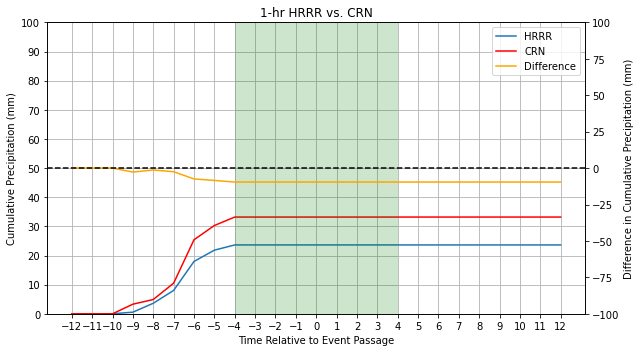

In [265]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_newt, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [266]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [267]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",newtonga1)

RSME 1-hr 48-hr HRRR vs CRN : 8.243527754547802


In [268]:
#3 hr hrrr:
with open('hrrr_f03_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2140:2165]
    #temp[10]=0
    temp=np.cumsum(temp)
    #temp[10]=None
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.     0.     0.329  2.722 28.367 28.37  28.37  28.37
 28.37  28.37  28.37  28.37  28.37  28.37  28.37  28.37  28.37  28.37
 28.37  28.37  28.37  28.37  28.37 ]


In [269]:
# #Air Temp CRN:
# with open('CRNH0203-2022-GA_Newton_11_SW.txt') as f:
#     lst=[line.split()[12] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1952:1977]
#     temp_crn[10]=0
#     temp_crn=np.cumsum(temp_crn)
#     temp_crn[10]=None
#     print(temp_crn)
#     #print(len(temp_crn))
#     # print(temp_crn[2124])

In [270]:
diff3_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_newt.append(temp_i-temp_crn_i)

print(diff3_newt)

[0.0, 0.0, 0.0, -3.3, -4.571000000000001, -7.7780000000000005, 2.9670000000000023, -1.9299999999999962, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995, -4.829999999999995]


In [271]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [272]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",newtonga3)

RSME 3-hr 48-hr HRRR vs CRN : 4.478395310822836


In [273]:
#6 hr hrrr:
with open('hrrr_f06_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2137:2162]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 0.0000e+00 0.0000e+00 1.0000e-03 2.0000e-03 5.6090e+00
 4.1769e+01 4.5655e+01 4.5658e+01 4.5658e+01 4.5658e+01 4.5658e+01
 4.5658e+01 4.5658e+01 4.5658e+01 4.5658e+01 4.5658e+01 4.5658e+01
 4.5658e+01 4.5658e+01 4.5658e+01 4.5658e+01 4.5658e+01 4.5658e+01
 4.5658e+01]


In [274]:
# #Air Temp CRN:
# with open('CRNH0203-2022-GA_Newton_11_SW.txt') as f:
#     lst=[line.split()[12] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1952:1977]
#     temp_crn=np.cumsum(temp_crn)
#     print(temp_crn)
#     #print(len(temp_crn))
#     # print(temp_crn[2124])

In [275]:
diff6_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_newt.append(temp_i-temp_crn_i)

print(diff6_newt)

[0.0, 0.0, 0.0, -3.299, -4.898000000000001, -4.891, 16.369, 15.355000000000004, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006, 12.458000000000006]


In [276]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [277]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",newtonga6)

RSME 6-hr 48-hr HRRR vs CRN : 11.315380435495754


In [278]:
#12 hr hrrr:
with open('hrrr_f12_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2131:2156]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e-03 6.8260e+00
 1.5502e+01 1.5516e+01 1.5516e+01 1.5517e+01 1.5517e+01 1.5517e+01
 1.5517e+01 1.5517e+01 1.5517e+01 1.5517e+01 1.5517e+01 1.5517e+01
 1.5517e+01 1.5517e+01 1.5517e+01 1.5517e+01 1.5517e+01 1.5517e+01
 1.5517e+01]
25


In [279]:
diff12_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_newt.append(temp_i-temp_crn_i)

print(diff12_newt)

[0.0, 0.0, 0.0, -3.3, -4.899, -3.6739999999999995, -9.897999999999998, -14.783999999999997, -17.683999999999997, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996, -17.682999999999996]


In [280]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [281]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",newtonga12)

RSME 12-hr 48-hr HRRR vs CRN : 15.074037570604629


In [282]:
#18 hr hrrr:
with open('hrrr_f18_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2125:2150]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 0.0000e+00 0.0000e+00 4.8000e-02 5.6600e-01 1.8097e+01
 4.5655e+01 5.1476e+01 5.3973e+01 5.4069e+01 5.4069e+01 5.4069e+01
 5.4069e+01 5.4069e+01 5.4069e+01 5.4069e+01 5.4069e+01 5.4069e+01
 5.4069e+01 5.4069e+01 5.4069e+01 5.4069e+01 5.4069e+01 5.4069e+01
 5.4069e+01]


In [283]:
diff18_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_newt.append(temp_i-temp_crn_i)

print(diff18_newt)

[0.0, 0.0, 0.0, -3.252, -4.3340000000000005, 7.596999999999998, 20.255000000000003, 21.176000000000002, 20.773000000000003, 20.869, 20.869, 20.869, 20.869, 20.869, 20.869, 20.869, 20.869, 20.869, 20.869, 20.869, 20.869, 20.869, 20.869, 20.869, 20.869]


In [284]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [285]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",newtonga18)

RSME 18-hr 48-hr HRRR vs CRN : 18.270765254909275


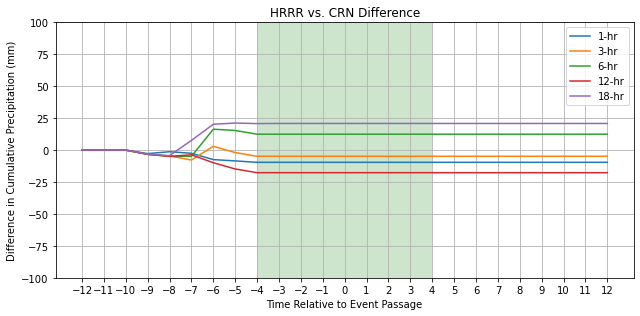

In [286]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_newt,label="1-hr")
plt.plot(hour,diff3_newt,label="3-hr")
plt.plot(hour,diff6_newt,label="6-hr")
plt.plot(hour,diff12_newt,label="12-hr")
plt.plot(hour,diff18_newt,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

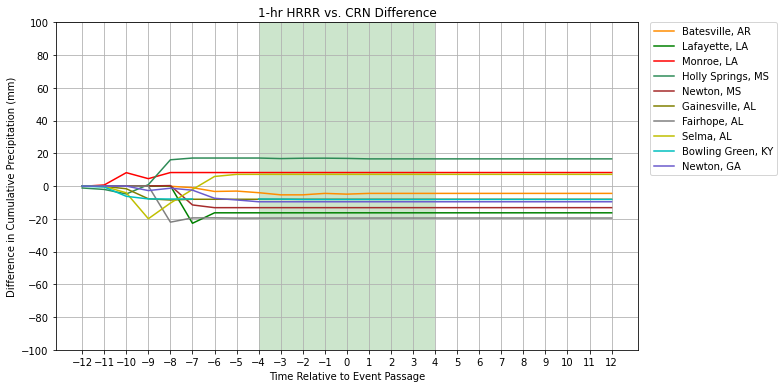

In [287]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
#plt.plot(hour,difference_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,difference_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,difference_laf,c='g',label="Lafayette, LA")
plt.plot(hour,difference_mon,c='r',label="Monroe, LA")
plt.plot(hour,difference_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,difference_new,c='brown',label="Newton, MS")
plt.plot(hour,difference_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,difference_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,difference_sel,c='y',label="Selma, AL")
plt.plot(hour,difference_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,difference_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,difference_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("1-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

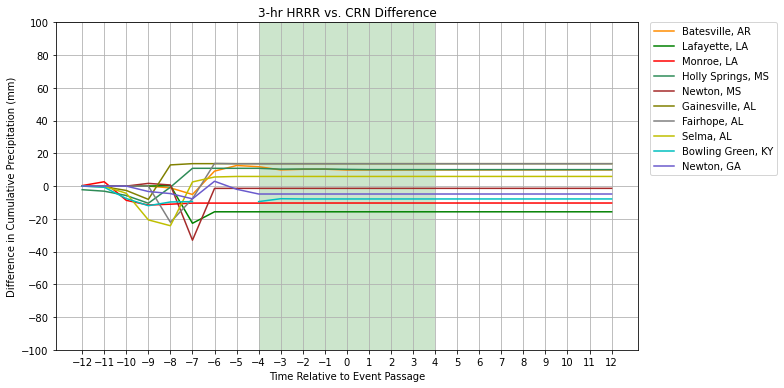

In [288]:
#plot 3-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
#plt.plot(hour,diff3_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff3_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff3_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff3_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff3_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff3_new,c='brown',label="Newton, MS")
plt.plot(hour,diff3_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff3_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff3_sel,c='y',label="Selma, AL")
plt.plot(hour,diff3_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,diff3_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff3_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("3-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

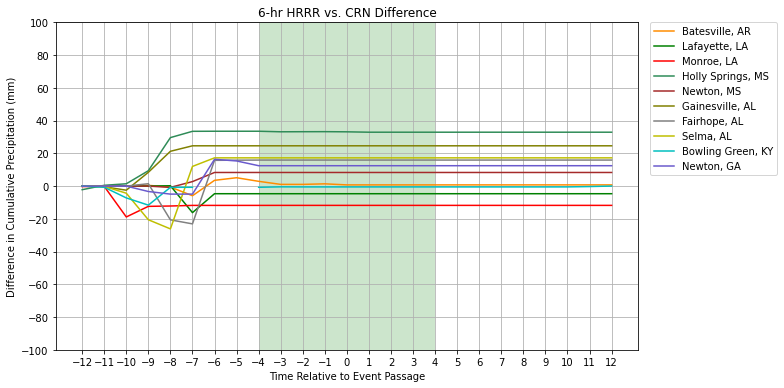

In [289]:
#plot 6-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
#plt.plot(hour,diff6_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff6_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff6_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff6_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff6_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff6_new,c='brown',label="Newton, MS")
plt.plot(hour,diff6_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff6_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff6_sel,c='y',label="Selma, AL")
plt.plot(hour,diff6_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,diff6_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff6_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("6-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

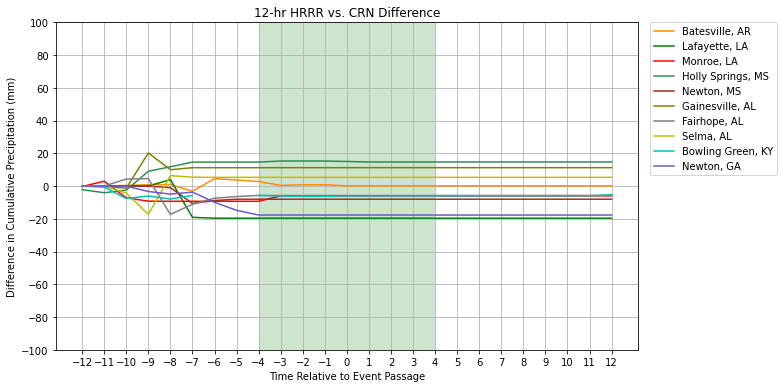

In [290]:
#plot 3-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
#plt.plot(hour,diff6_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff12_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff12_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff12_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff12_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff12_new,c='brown',label="Newton, MS")
plt.plot(hour,diff12_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff12_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff12_sel,c='y',label="Selma, AL")
plt.plot(hour,diff12_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,diff12_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff12_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("12-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

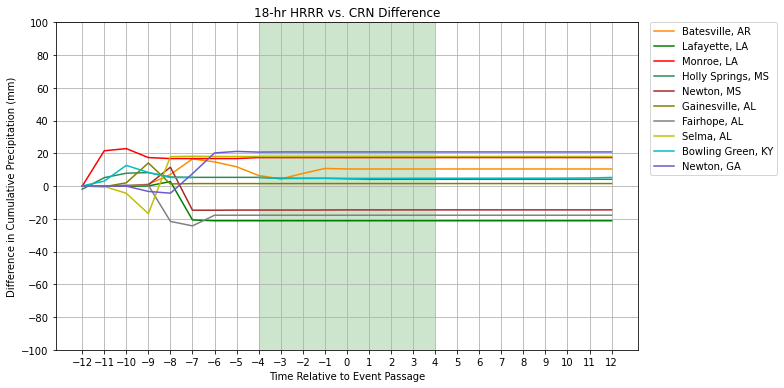

In [291]:
#plot 3-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
#plt.plot(hour,diff18_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff18_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff18_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff18_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff18_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff18_new,c='brown',label="Newton, MS")
plt.plot(hour,diff18_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff18_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff18_sel,c='y',label="Selma, AL")
plt.plot(hour,diff18_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,diff18_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff18_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("18-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()